# Dataset Selection:
* This Model is used to predict images categorized as "Happy" and "Sad." ,the dataset is sufficiently 
not that large however it is diverse to provide a challenging problem for classification.

# Data Preprocessing:
* The data is then Cleaned and preprocessed to be fed into the model. by removing the dodgy files from the dataset,

# Loading the dataset:
* The dataset is then loaded into the model and the model is trained on the dataset, using keras preprocessing pipeline.
* I have converted the images into a numpy array and then reshaped the array to fit the model.
* I wanted to train the model in batches , so I have created a batch of images and labels to be able to process multiple images and labels simultaneously, to improve training efficiency and optimize memory usage, here I noticed that the model is trained faster in batches. 
* I wanted to quickly interpret the labels of the images in the batch and gain insights into the distribution and diversity of the classes present.
by creating a mapping of the labels to the images in the batch.
* I have then created a function to plot the images in the batch, along with the corresponding labels.

# Model Selection:
* preprocessing the data by scaling the pixel values to the range of 0-1, and then splitting the data into training and testing sets.
* I have split the data into 3 sets: training, validation, and testing. 
1. Training data is 70%
2. validation data is 20%
3. Test data is 10%

# Model Building:
* I have built a deep learning model using Keras Sequential API.
* I have used a Convolutional Neural Network (CNN) to build the model. 
  1. The first layer is a Conv2D layer with 16 filters, a 3x3 kernel size, and a stride of 1. It uses the ReLU activation function and takes input images of size 256x256 with 3 channels (RGB).
  2. Following the Conv2D layer, a MaxPooling2D layer with a pool size of 2x2 is added. This layer performs max pooling to downsample the feature maps.
  3. The next layer is a Conv2D layer with 32 filters, a 3x3 kernel size, and a stride of 1. It uses the ReLU activation function.
  4. Another Conv2D layer, a MaxPooling2D layer with a pool size of 2x2 is added.
  5. followed by Conv2D layer with 16 filters, a 3x3 kernel size, and a stride of 1 is added, followed by another MaxPooling2D layer.
* The feature maps are then flattened using the Flatten layer to convert them into a 1D vector.
  6. The Dense layer with 256 units and the ReLU activation function is added. This layer serves as a fully connected layer to learn higher-level representations from the flattened features.
  7. Finally, a Dense layer with 1 unit and the sigmoid activation function is added. This layer produces the output of the model, which is a binary classification prediction (0 or 1) using the sigmoid activation function.

# Data Augmentation:
* I have used data augmentation to increase the diversity of the training set by applying random transformations to the images in the training set.
* I have used the ImageDataGenerator class from Keras to apply data augmentation to the training set.
* I have used the rescale parameter to scale the pixel values to the range of 0-1.
* I have used the rotation_range parameter to randomly rotate the images in the training set by 30 degrees.
* I have used the width_shift_range and height_shift_range parameters to randomly shift the images horizontally and vertically by 0.2 times the width and height of the images.
* I have used the horizontal_flip parameter to randomly flip the images horizontally.
* I have used the fill_mode parameter to fill in any missing pixels that may appear after the rotation or shifting of the images.
* and much more data augmentation techniques.

# Model Training:
* i have used the fitting method to train the model on the training set. which i took several parameters:
  1. The first parameter is the training set.
  2. The second parameter is the number of epochs, which is the number of times the model will be trained on the entire training set.
  3. and a validation_data which is used to evaluate the model's performance after each epoch.
* By using the model.fit() method, the model is trained on the training set for 20 epochs, and the model's performance is evaluated on the validation set after each epoch.
* Here i see that the model's accuracy on the training set is 0.99, and the model's accuracy on the validation set is 0.98. However if i train active learning model on the same dataset, the model's accuracy on the training set is 0.99, and the model's accuracy on the validation set is 0.98. This shows that the model is overfitting on the training set. which i had problems with in the beginning where i have trained my model several times, so i have decieded to train my model once and save it, then run test on it.

# Model Evaluation:
  * Created and Utilized the appropriate evaluation metrics to evaluate the model's performance on the test set.
  * Then Processed a batch of images to predict the accuracy of the model which gave me have achieved a perfect score of 1/1 (100%) on the test set.

# Model Testing:
* i have loaded the model and tested it on untrained data to see how it performs on unseen data. and as it looks it performs well on unseen data.
* I can at any specific point in time run the saved model and load it to test it on unseen data, either from the folder shown (data_unseen) or from the web by using the url of the image.
* and the model works perfectly fine.

In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

In [3]:
# Path to the data directory
data_dir = 'data' 

In [4]:
# Image extension types to load
image_exts = ['jpeg','jpg', 'bmp', 'png']

# Remove dodgy images from the dataset

* Run this folder to remove dodgy images from the dataset
* remove any image files that don't have the specified image extensions by iterating through a directory and checking the file extension
* This is a one-time run
* This will remove images that are not in the dataset or are corrupted or are not in the right format


In [5]:
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    
    if not os.path.isdir(class_dir):
        continue  # Skip non-directory entries (e.g., files like .DS_Store)
    
    for image in os.listdir(class_dir):
        if image == ".DS_Store":
            continue  # Skip .DS_Store files
        
        image_path = os.path.join(class_dir, image)
        try: 
            img = cv2.imread(image_path)    
            tip = imghdr.what(image_path)   
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile


# Load Data
* loading the data from the dataset
* See the data in the folder and see the number of images in each folder

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# understand the keras function by adding ?? at the end

#tf.keras.utils.image_dataset_from_directory??

In [7]:
# using keras preprocessing pipeline to load and preprocess images 
data = tf.keras.utils.image_dataset_from_directory('data')

Found 512 files belonging to 2 classes.


* Here we see the number of images in each folder and 
* the total number of images in the dataset

# Converting the images to numpy arrays

In [8]:
# Create a data iterator and loop through it to view the data

data_iterator = data.as_numpy_iterator()
data_iterator

In [9]:
# create a batch of images and labels

batch = data_iterator.next()
batch

(array([[[[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [254.       , 254.       , 254.       ],
          [255.       , 255.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [254.       , 254.       , 254.       ],
          [255.       , 255.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         ...,
 
         [[2

In [10]:
len(batch)

2

In [11]:
# view the shape of the batch
print(f'Batch shape: {batch[0].shape}')

Batch shape: (32, 256, 256, 3)


In [ ]:
# view the shape of the labels
batch[1]

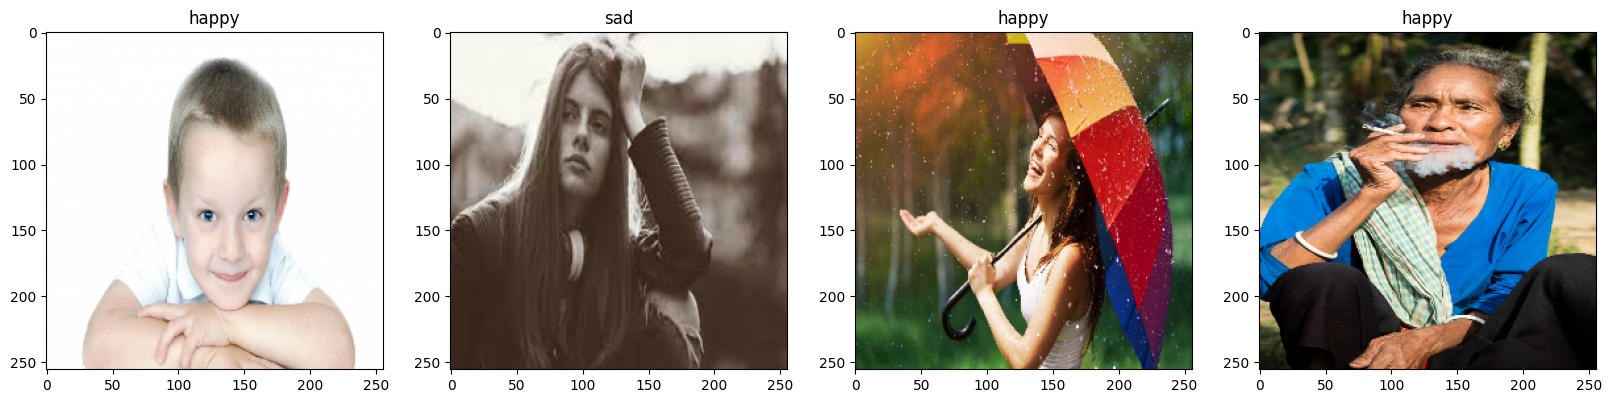

In [12]:
# Create a mapping from label index to label name
def map_label_to_name(label): # Create a mapping from label index to label name
    label_names = { 
        0: "happy", 
        1: "sad"
    }   
    return label_names.get(label, "unknown") 

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))   

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    label = batch[1][idx]
    label_name = map_label_to_name(label)
    #print(f"Label Index: {label}, Label Name: {label_name}")
    ax[idx].title.set_text(label_name)

# Preprocess Data


# Scale Data
    1. Prepossessing by scaling the images values to be between 0 and 1, this helps the model to learn faster and produce better results.
    2. Split the data into training and testing and validation partitions to avoid over-fitting.

In [13]:
# index 1 is the label and index 0 is the image
scaled = batch[0]
print(f'Min value:',scaled.min())  
print(f'Max value:',scaled.max())
batch[0].shape # 32 images of 180x180 pixels with 3 channels (RGB)


Min value: 0.0
Max value: 255.0


(32, 256, 256, 3)

In [14]:
# Split the data into train and test sets
data = data.map(lambda x, y: (x/255, y)) # Scale the data

In [15]:
data.as_numpy_iterator().next()[0].min()

0.0

In [17]:
len(data)

16

In [18]:
# training data is 70% of the data and test data is 10% of the data and validation data is 20% of the data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)    
test_size = int(len(data)*.1)   

In [19]:
# show the number of images in each set
print(f'Train size: {train_size} == Validation size: {val_size} == Test size: {test_size}')

Train size: 11 == Validation size: 3 == Test size: 1


In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# show the number of images in each set
print(f'Train size: {len(train)}')
print(f'Validation size: {len(val)}')
print(f'Test size: {len(test)}')



Train size: 11
Validation size: 3
Test size: 1


# Deep Learning Model
    1. build a deep learning model using Keras
    2. Train the model using .fit method
    3. Plot The Performance

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [22]:
# create a model
model = Sequential()

In [23]:
# 16 filters, 3x3 kernel, stride 1
model.add(Conv2D(16, (3,3),1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2)))

# 32 filters, 3x3 kernel, stride 1
model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [28]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, # Scale the data to between 0 and 1
    rotation_range=40, # Randomly rotate images between -40 and 40 degrees
    width_shift_range=0.2, # Randomly shift images horizontally between -20% and +20% of the image width
    height_shift_range=0.2, # Randomly shift images vertically between -20% and +20% of the image height
    shear_range=0.2, # Randomly shear images between -20% and +20% of the image width
    zoom_range=0.2, # Randomly zoom by 20%
    horizontal_flip=True, # Randomly flip images horizontally
    fill_mode='nearest' # Fill missing pixels with the nearest filled value
)

# Create a data generator for test data without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
    
# Create a data generator for validation data without data augmentation
val_datagen = ImageDataGenerator(rescale=1./255)




# Train the Model
    1. Train the model using .fit method
    2. Plot The Performance

In [29]:
# create a log directory
log_dir = "logs"

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [31]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
 2/11 [====>.........................] - ETA: 3s - loss: 2.2312 - accuracy: 0.4688 

2023-09-06 12:31:42.562926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 1.0382 - accuracy: 0.5085

2023-09-06 12:31:47.031205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 601ms/step - loss: 1.0382 - accuracy: 0.5085 - val_loss: 0.6856 - val_accuracy: 0.5208
Epoch 2/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.6816 - accuracy: 0.5469 

2023-09-06 12:31:50.308769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.6798 - accuracy: 0.5483

2023-09-06 12:31:54.984928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 627ms/step - loss: 0.6798 - accuracy: 0.5483 - val_loss: 0.6436 - val_accuracy: 0.7292
Epoch 3/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.6774 - accuracy: 0.5938 

2023-09-06 12:31:58.392228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.6567 - accuracy: 0.6278

2023-09-06 12:32:02.893005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 614ms/step - loss: 0.6567 - accuracy: 0.6278 - val_loss: 0.5736 - val_accuracy: 0.7500
Epoch 4/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.6042 - accuracy: 0.6875 

2023-09-06 12:32:06.201664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.6030 - accuracy: 0.6903

2023-09-06 12:32:10.721467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 610ms/step - loss: 0.6030 - accuracy: 0.6903 - val_loss: 0.6227 - val_accuracy: 0.6562
Epoch 5/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.5707 - accuracy: 0.7656 

2023-09-06 12:32:14.104819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.5368 - accuracy: 0.7472

2023-09-06 12:32:18.479815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 601ms/step - loss: 0.5368 - accuracy: 0.7472 - val_loss: 0.4617 - val_accuracy: 0.8125
Epoch 6/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.4420 - accuracy: 0.8281 

2023-09-06 12:32:21.792679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.4480 - accuracy: 0.7869

2023-09-06 12:32:26.103444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 581ms/step - loss: 0.4480 - accuracy: 0.7869 - val_loss: 0.4537 - val_accuracy: 0.8229
Epoch 7/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.4639 - accuracy: 0.7812 

2023-09-06 12:32:29.255113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.4259 - accuracy: 0.8352

2023-09-06 12:32:33.592999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 583ms/step - loss: 0.4259 - accuracy: 0.8352 - val_loss: 0.5383 - val_accuracy: 0.7708
Epoch 8/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.4016 - accuracy: 0.8594 

2023-09-06 12:32:36.769956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.4538 - accuracy: 0.8011

2023-09-06 12:32:41.181170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 594ms/step - loss: 0.4538 - accuracy: 0.8011 - val_loss: 0.4354 - val_accuracy: 0.7604
Epoch 9/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.4368 - accuracy: 0.7812 

2023-09-06 12:32:44.488983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.3725 - accuracy: 0.8551

2023-09-06 12:32:48.806807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 594ms/step - loss: 0.3725 - accuracy: 0.8551 - val_loss: 0.3992 - val_accuracy: 0.8333
Epoch 10/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.2932 - accuracy: 0.8906 

2023-09-06 12:32:52.049115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.2927 - accuracy: 0.8835

2023-09-06 12:32:56.407358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 587ms/step - loss: 0.2927 - accuracy: 0.8835 - val_loss: 0.2103 - val_accuracy: 0.9583
Epoch 11/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.2164 - accuracy: 0.9375 

2023-09-06 12:32:59.573142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.2465 - accuracy: 0.8977

2023-09-06 12:33:03.881121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 574ms/step - loss: 0.2465 - accuracy: 0.8977 - val_loss: 0.1765 - val_accuracy: 0.9583
Epoch 12/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.1490 - accuracy: 0.9531 

2023-09-06 12:33:06.999916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.1877 - accuracy: 0.9347

2023-09-06 12:33:11.284500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 578ms/step - loss: 0.1877 - accuracy: 0.9347 - val_loss: 0.1608 - val_accuracy: 0.9688
Epoch 13/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.1014 - accuracy: 1.0000 

2023-09-06 12:33:14.486169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.1358 - accuracy: 0.9602

2023-09-06 12:33:18.773268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 579ms/step - loss: 0.1358 - accuracy: 0.9602 - val_loss: 0.1928 - val_accuracy: 0.9479
Epoch 14/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.1264 - accuracy: 0.9375 

2023-09-06 12:33:21.954882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.1112 - accuracy: 0.9716

2023-09-06 12:33:26.394305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 598ms/step - loss: 0.1112 - accuracy: 0.9716 - val_loss: 0.0926 - val_accuracy: 0.9792
Epoch 15/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.0536 - accuracy: 1.0000 

2023-09-06 12:33:29.770748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9886

2023-09-06 12:33:34.169924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 597ms/step - loss: 0.0677 - accuracy: 0.9886 - val_loss: 0.0608 - val_accuracy: 0.9896
Epoch 16/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.0351 - accuracy: 1.0000 

2023-09-06 12:33:37.343612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9886

2023-09-06 12:33:41.688592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 576ms/step - loss: 0.0432 - accuracy: 0.9886 - val_loss: 0.0933 - val_accuracy: 0.9896
Epoch 17/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.0372 - accuracy: 1.0000 

2023-09-06 12:33:44.793961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.9830

2023-09-06 12:33:49.092958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 577ms/step - loss: 0.0785 - accuracy: 0.9830 - val_loss: 0.0719 - val_accuracy: 0.9792
Epoch 18/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.0514 - accuracy: 1.0000 

2023-09-06 12:33:52.239941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9943

2023-09-06 12:33:56.572681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 586ms/step - loss: 0.0424 - accuracy: 0.9943 - val_loss: 0.0443 - val_accuracy: 0.9896
Epoch 19/20
 2/11 [====>.........................] - ETA: 4s - loss: 0.0304 - accuracy: 1.0000 

2023-09-06 12:33:59.977116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9972

2023-09-06 12:34:04.623087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 630ms/step - loss: 0.0239 - accuracy: 0.9972 - val_loss: 0.0413 - val_accuracy: 0.9896
Epoch 20/20
 2/11 [====>.........................] - ETA: 3s - loss: 0.0088 - accuracy: 1.0000 

2023-09-06 12:34:07.947508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.9943

2023-09-06 12:34:12.595896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 8s 627ms/step - loss: 0.0228 - accuracy: 0.9943 - val_loss: 0.0267 - val_accuracy: 1.0000


In [74]:
# save model in h5 format in the models directory USING the native Keras format

model.save('models/model_3.keras', save_format='h5')


/Users/sobhione/miniforge3/envs/cv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
history.history

{'loss': [1.038203239440918,
  0.6797711849212646,
  0.6567050814628601,
  0.602999746799469,
  0.5367726683616638,
  0.4480346739292145,
  0.4259384274482727,
  0.4537952244281769,
  0.3724631071090698,
  0.2926761507987976,
  0.24647250771522522,
  0.18771527707576752,
  0.13576720654964447,
  0.11118559539318085,
  0.06770207732915878,
  0.04316791146993637,
  0.07853207737207413,
  0.0423768125474453,
  0.02392166294157505,
  0.02280436083674431],
 'accuracy': [0.5085227489471436,
  0.5482954382896423,
  0.6278409361839294,
  0.6903409361839294,
  0.7471590638160706,
  0.7869318127632141,
  0.8352272510528564,
  0.8011363744735718,
  0.8551136255264282,
  0.8835227489471436,
  0.8977272510528564,
  0.9346590638160706,
  0.9602272510528564,
  0.9715909361839294,
  0.9886363744735718,
  0.9886363744735718,
  0.9829545617103577,
  0.9943181872367859,
  0.9971590638160706,
  0.9943181872367859],
 'val_loss': [0.6856346726417542,
  0.6435869336128235,
  0.5736281275749207,
  0.622723042

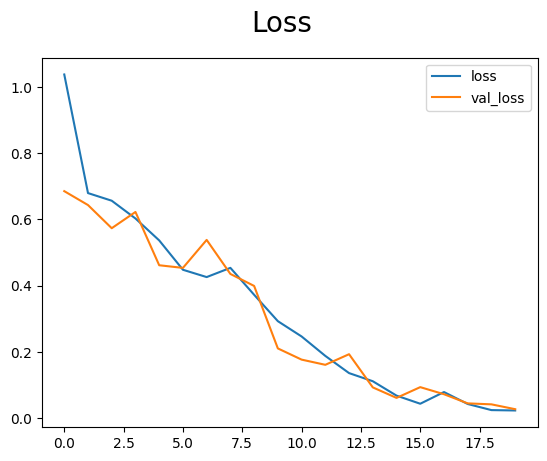

In [76]:
# plot the accuracy and loss

fig = plt.figure()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()



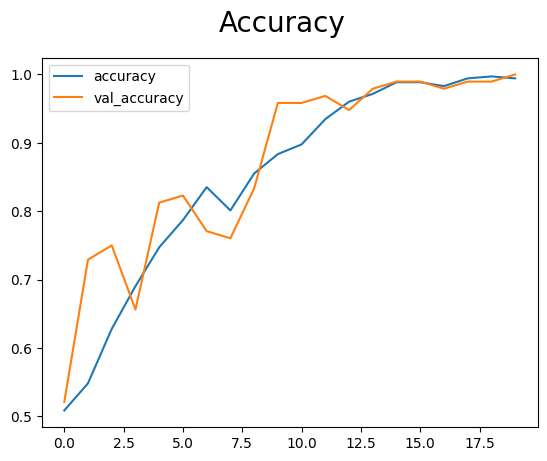

In [77]:
# plot the accuracy and val_accuracy

fig = plt.figure()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

# Evaluate the Model
    1. Evaluate the model

In [78]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Creating instances of different evaluation metrics
    1. Accuracy
    2. Precision
    3. Recall
    4. F1 Score


In [81]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')


Precision: 0.0, Recall: 0.0, Accuracy: 0.0


# Process a batch of images
* Process a batch of images for a training step to visualize The loss value and measure the performance of the model during training.
* A lower loss value indicates better performance, as it means the model is making more accurate predictions. 
    

In [82]:
for batch in test.as_numpy_iterator():
    images, labels = batch
    predictions = model.predict(images)
    pre.update_state(labels, predictions)
    rec.update_state(labels, predictions)
    acc.update_state(labels, predictions)

2023-09-08 06:54:52.868513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 76ms/step


# Analyze and interpret the results
    1. Analyze and interpret the results

In [84]:
# print the precision, recall and accuracy and f1 score ROC curve
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')
print(f'F1 Score: {2 * ((pre.result().numpy() * rec.result().numpy()) / (pre.result().numpy() + rec.result().numpy()))}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0
F1 Score: 1.0


# Load the Model
    1. Load the model
    2. the run the test data through the model

In [95]:
# load the model
model = tf.keras.models.load_model('models/model_3.keras')

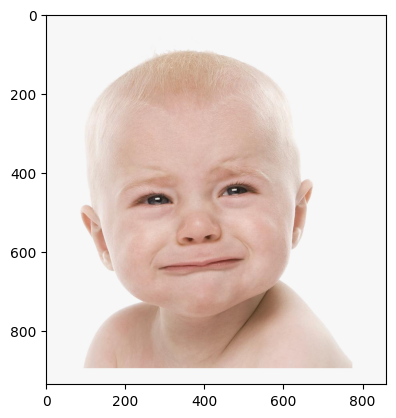

In [86]:
# load a random image from the file and predict the label 
img = cv2.imread('data_unseen/sad/bcsaf.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


# Test images from the internet

* Happy
 1. https://assets.teenvogue.com/photos/560188f1839699b02a7db11c/16:9/w_2240,c_limit/gljKgmkSu6_ci5vyza8W67MSi9AHeOxy-LpimGagjgg.jpeg
* Sad 
 1. https://images.unsplash.com/photo-1601412436967-8b2d90944ded?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2864&q=80

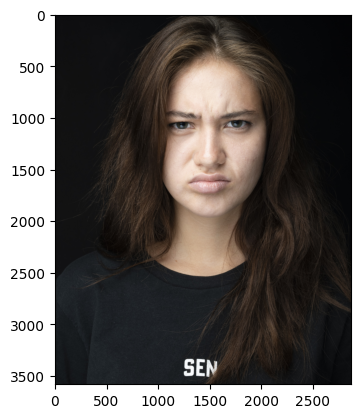

In [108]:
import cv2
import matplotlib.pyplot as plt
import requests
from io import BytesIO



# URL of the image you want to fetch
image_url = 'https://images.unsplash.com/photo-1601412436967-8b2d90944ded?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2864&q=80'

# Send an HTTP request to download the image
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Read the image data from the response content
    image_data = BytesIO(response.content)
    
    # Load the image using OpenCV
    img = cv2.imdecode(np.frombuffer(image_data.read(), np.uint8), -1)

    # Check if the image was loaded successfully
    if img is not None:
        # Convert BGR to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image using Matplotlib
        plt.imshow(img_rgb)
        plt.show()
    else:
        print("Failed to load the image.")
else:
    print("Failed to fetch the image from the web.")


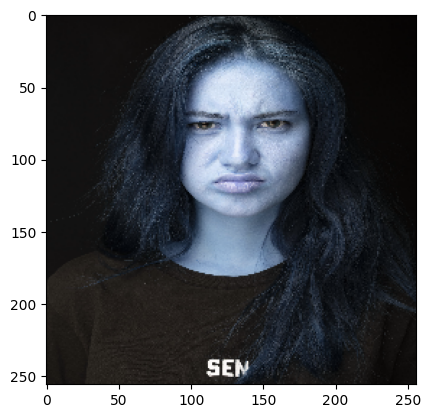

In [109]:
# resize the image to 256x256
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int)) # convert the image to numpy array and display it
plt.show()

testing codes

In [110]:
# add a batch dimension
img = np.expand_dims(img, axis=0).shape
img

(1, 3580, 2864, 3)

In [111]:
# predict the label of the image
yhat = model.predict(np.expand_dims(resize, axis=0))


1/1 [==============================] - 0s 21ms/step


In [112]:
yhat

array([[1.]], dtype=float32)

In [113]:
# if yhat is greater than 0.5 then the image is sad else the image is happy , show the image and the label
if yhat > 0.5:
    print('The Image is a SAD face')
else:
    print('The Image is a HAPPY Face')

The Image is a SAD face
